In [ ]:
# 导包
import pandas as pd
import numpy as np
import re
import os

In [ ]:
# 读取数据
'''
combined_df_11_29.csv 是从LIS表中提取的数据，共计43869行
'''
combined_df_11_29=pd.read_csv('combined_df_11_29.csv',dtype='str',index_col=0)
print(combined_df_11_29.shape)
combined_df_11_29.head()

In [3]:
# 查看缺失值相关信息

combined_df_11_29.isna().sum()

登记号             0
患者姓名            0
检验日期            0
CEA         32736
AFP         32982
CA125       25448
SCC         39214
HE4         41832
HGB          6085
PLT          6084
NEUT         6086
NEUT%        6086
LYMPH        6086
LYMPH%       6086
MONO         6086
MONO%        6086
TT          15787
Fg          16207
ALT         21130
AST         21130
TB          21130
ALB         21130
Urea        21130
Cr          21130
LDH         21127
PAT-PT      21454
PAT-APPT    21456
CA153       43869
CA199       43869
ThCG        43869
dtype: int64

In [4]:
'''
ca153 ca199 thcg  没有数据，故删除这些列
'''
combined_df_11_29.drop(['CA153', 'CA199','ThCG'], axis=1, inplace=True)

In [5]:
# 删除缺失值过多的行
# data=combined_df_11_29[~combined_df_11_29['HE4'].isna()].dropna(thresh=15).copy()
data=combined_df_11_29[['登记号','检验日期','CEA','CA125','HE4','SCC','AFP','PAT-APPT','HGB']].dropna(thresh=6).copy()
data=data[~data['HE4'].isna() | ~data['SCC'].isna()]
print(data.shape)
data.head()

(2422, 9)


,登记号,检验日期,CEA,CA125,HE4,SCC,AFP,PAT-APPT,HGB
174,00030541,2019-03-11,<0.5,10.5,NaN,0.80,NaN,NaN,133
185,00031780,2020-06-06,0.7,19.7,NaN,10.30,5.8,NaN,65
186,00031780,2020-08-17,NaN,10.7,NaN,17.90,NaN,23.1,69
188,00031780,2020-10-19,<0.5,14.3,NaN,1.90,5.4,NaN,77
191,00031780,2021-02-26,NaN,16.5,NaN,1.10,NaN,24.0,97


In [6]:
# 给这些数据打标签
# 读取病案数据
medical_record_1=pd.read_csv('medical_record_1.csv',dtype='str',index_col=0)
medical_record_1.dropna(subset=['诊断内容','入院时间'],inplace=True)
medical_record_1['诊断内容'].value_counts()

诊断内容
子宫平滑肌瘤        19530
子宫多发性平滑肌瘤      8757
子宫肌壁间平滑肌瘤      3094
子宫粘膜下平滑肌瘤      1372
子宫浆膜下平滑肌瘤       871
妊娠合并子宫肌瘤        759
子宫粘膜下肌瘤         379
子宫浆膜下肌瘤         234
子宫黏膜下平滑肌瘤       181
子宫肌壁间肌瘤          98
子宫壁内平滑肌瘤         64
子宫颈平滑肌瘤          44
子宫颈粘膜下平滑肌瘤       40
子宫内膜间质肉瘤         32
子宫浆膜下层平滑肌瘤       12
子宫平滑肌肉瘤           9
子宫癌肉瘤             8
子宫颈壁内平滑肌瘤         5
子宫腺肉瘤             4
Name: count, dtype: int64

In [7]:
diagnose=medical_record_1.loc[:,['患者登记号','诊断内容','入院时间']].copy()
diagnose.head()

,患者登记号,诊断内容,入院时间
26,08510228,子宫平滑肌瘤,2020-03-03 00:00:00
31,00658475,子宫平滑肌瘤,2016-03-31 00:00:00
33,09210521,子宫多发性平滑肌瘤,2019-01-18 00:00:00
38,00846704,子宫平滑肌瘤,2016-06-02 00:00:00
41,03625496,子宫多发性平滑肌瘤,2018-08-18 00:00:00


In [8]:
merged_df=pd.merge(data,diagnose,left_on='登记号',right_on='患者登记号')
print(merged_df.shape)
merged_df

(1160, 12)


,登记号,检验日期,CEA,CA125,HE4,SCC,AFP,PAT-APPT,HGB,患者登记号,诊断内容,入院时间
0,00032328,2019-04-01,<0.5,18.6,NaN,1.80,NaN,NaN,110,00032328,子宫多发性平滑肌瘤,2019-05-29 00:00:00
1,00032328,2019-04-01,<0.5,18.6,NaN,1.80,NaN,NaN,110,00032328,子宫多发性平滑肌瘤,2019-05-20 00:00:00
2,00032328,2019-09-04,<0.5,12.2,NaN,1.00,NaN,NaN,133,00032328,子宫多发性平滑肌瘤,2019-05-29 00:00:00
3,00032328,2019-09-04,<0.5,12.2,NaN,1.00,NaN,NaN,133,00032328,子宫多发性平滑肌瘤,2019-05-20 00:00:00
4,00057251,2020-12-14,<0.5,27.0,31.1,1.00,<1.3,NaN,NaN,00057251,子宫平滑肌瘤,2021-03-16 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1155,22068410,2023-06-27,1.8,1180.7,38.0,NaN,2.4,NaN,94,22068410,子宫平滑肌瘤,2023-07-04 00:00:00
1156,22068410,2023-08-16,NaN,57.0,41.8,NaN,NaN,24.5,117,22068410,子宫平滑肌瘤,2023-07-04 00:00:00
1157,22079998,2023-08-28,1.5,13.7,NaN,0.70,<1.3,27.3,140,22079998,子宫多发性平滑肌瘤,2023-08-28 00:00:00
1158,22092842,2023-07-20,1.2,11.2,28.2,NaN,2.3,NaN,125,22092842,子宫多发性平滑肌瘤,2023-07-31 00:00:00


In [9]:
# 保留入院时间和检验日期相差30天以内的行
merged_df['检验日期']=pd.to_datetime(merged_df['检验日期'],format='%Y-%m-%d')
merged_df['入院时间']=pd.to_datetime(merged_df['入院时间'].str.split().str[0],format='%Y-%m-%d')

In [10]:
# 检验日期与入院时间匹配
merged_df_1=merged_df[abs(merged_df['检验日期']-merged_df['入院时间']).dt.days<280].copy()
print(merged_df_1.shape)
merged_df_1.head()

(765, 12)


,登记号,检验日期,CEA,CA125,HE4,SCC,AFP,PAT-APPT,HGB,患者登记号,诊断内容,入院时间
0,00032328,2019-04-01,<0.5,18.6,NaN,1.80,NaN,NaN,110,00032328,子宫多发性平滑肌瘤,2019-05-29
1,00032328,2019-04-01,<0.5,18.6,NaN,1.80,NaN,NaN,110,00032328,子宫多发性平滑肌瘤,2019-05-20
2,00032328,2019-09-04,<0.5,12.2,NaN,1.00,NaN,NaN,133,00032328,子宫多发性平滑肌瘤,2019-05-29
3,00032328,2019-09-04,<0.5,12.2,NaN,1.00,NaN,NaN,133,00032328,子宫多发性平滑肌瘤,2019-05-20
4,00057251,2020-12-14,<0.5,27.0,31.1,1.00,<1.3,NaN,NaN,00057251,子宫平滑肌瘤,2021-03-16


In [11]:
# 将特征列的数据转换成数值类型
merged_df_1['CEA'].replace(['<0.5','未做','<0.0'],['0.4',np.NAN,0],inplace=True)
merged_df_1['CEA']=pd.to_numeric(merged_df_1['CEA'])
merged_df_1['AFP'].replace(['<1.3','未做'],[1,np.NAN],inplace=True)
merged_df_1['AFP']=pd.to_numeric(merged_df_1['AFP'])
merged_df_1['CA125'].replace(['<2.0','未做','>12000.0'],[1,np.NAN,12000],inplace=True)
merged_df_1['CA125']=pd.to_numeric(merged_df_1['CA125'])
# merged_df_1['HGB']=pd.to_numeric(merged_df_1['HGB'])
# merged_df_1['PLT']=pd.to_numeric(merged_df_1['PLT'])
# merged_df_1['NEUT']=pd.to_numeric(merged_df_1['NEUT'])
# merged_df_1['NEUT%']=pd.to_numeric(merged_df_1['NEUT%'])
# merged_df_1['LYMPH']=pd.to_numeric(merged_df_1['LYMPH'])
# merged_df_1['LYMPH%']=pd.to_numeric(merged_df_1['LYMPH%'])
# merged_df_1['MONO']=pd.to_numeric(merged_df_1['MONO'])
# merged_df_1['MONO%']=pd.to_numeric(merged_df_1['MONO%'])
# merged_df_1['TT'].replace(['<1.3','未做'],[1,np.NAN],inplace=True)
# merged_df_1['TT']=pd.to_numeric(merged_df_1['TT'])
merged_df_1.replace(['未做','已上机'],np.NAN,inplace=True)
# merged_df_1['Fg']=pd.to_numeric(merged_df_1['Fg'])
# merged_df_1['ALT'].replace(['<8','<7','<6','<9','已上机'],[7,6,5,8,np.NAN],inplace=True)
# merged_df_1['ALT']=pd.to_numeric(merged_df_1['ALT'])
# merged_df_1['AST'].replace(['<8','<3','已上机'],[7,2,np.NAN],inplace=True)
# merged_df_1['AST']=pd.to_numeric(merged_df_1['AST'])
# merged_df_1['TB']=pd.to_numeric(merged_df_1['TB'])
# merged_df_1['ALB']=pd.to_numeric(merged_df_1['ALB'])
# merged_df_1['Urea'].replace(['<1.80','<1.40'],[1.7,1.3],inplace=True)
# merged_df_1['Urea']=pd.to_numeric(merged_df_1['Urea'])
merged_df_1['HE4'].replace(['>7500.0','>15000.0'],[7500,15000],inplace=True)
merged_df_1['HE4']=pd.to_numeric(merged_df_1['HE4'])
merged_df_1.replace('<0.5',0.3,inplace=True)

In [12]:
merged_df_1.isna().sum()

登记号           0
检验日期          0
CEA         162
CA125         5
HE4         366
SCC         336
AFP         279
PAT-APPT    319
HGB          28
患者登记号         0
诊断内容          0
入院时间          0
dtype: int64

In [13]:
merged_df_1['诊断内容'].value_counts()

诊断内容
子宫平滑肌瘤        446
子宫多发性平滑肌瘤     221
子宫肌壁间平滑肌瘤      63
子宫粘膜下平滑肌瘤      17
子宫浆膜下平滑肌瘤      13
子宫黏膜下平滑肌瘤       3
子宫颈平滑肌瘤         1
子宫颈粘膜下平滑肌瘤      1
Name: count, dtype: int64

In [14]:
merged_df_1['诊断内容'].replace(['子宫浆膜下层平滑肌瘤','子宫黏膜下平滑肌瘤'],['子宫浆膜下平滑肌瘤','子宫粘膜下平滑肌瘤'],inplace=True)
merged_df_1=merged_df_1[merged_df_1['诊断内容']!='妊娠合并子宫肌瘤'].copy()

In [15]:
merged_df_1.rename({'诊断内容':'diagnose'},axis=1,inplace=True)
merged_df_1['diagnose'].value_counts()

diagnose
子宫平滑肌瘤        446
子宫多发性平滑肌瘤     221
子宫肌壁间平滑肌瘤      63
子宫粘膜下平滑肌瘤      20
子宫浆膜下平滑肌瘤      13
子宫颈平滑肌瘤         1
子宫颈粘膜下平滑肌瘤      1
Name: count, dtype: int64

In [16]:
print(merged_df_1.shape)
merged_df_1.head()

(765, 12)


,登记号,检验日期,CEA,CA125,HE4,SCC,AFP,PAT-APPT,HGB,患者登记号,diagnose,入院时间
0,00032328,2019-04-01,0.4,18.6,NaN,1.80,NaN,NaN,110,00032328,子宫多发性平滑肌瘤,2019-05-29
1,00032328,2019-04-01,0.4,18.6,NaN,1.80,NaN,NaN,110,00032328,子宫多发性平滑肌瘤,2019-05-20
2,00032328,2019-09-04,0.4,12.2,NaN,1.00,NaN,NaN,133,00032328,子宫多发性平滑肌瘤,2019-05-29
3,00032328,2019-09-04,0.4,12.2,NaN,1.00,NaN,NaN,133,00032328,子宫多发性平滑肌瘤,2019-05-20
4,00057251,2020-12-14,0.4,27.0,31.1,1.00,1.0,NaN,NaN,00057251,子宫平滑肌瘤,2021-03-16


In [17]:
merged_df_1.drop('患者登记号',inplace=True,axis=1)

In [18]:
merged_df_1['diagnose'].value_counts()

diagnose
子宫平滑肌瘤        446
子宫多发性平滑肌瘤     221
子宫肌壁间平滑肌瘤      63
子宫粘膜下平滑肌瘤      20
子宫浆膜下平滑肌瘤      13
子宫颈平滑肌瘤         1
子宫颈粘膜下平滑肌瘤      1
Name: count, dtype: int64

In [19]:
# merged_df_1['diagnose'].replace(['子宫颈平滑肌瘤','子宫颈粘膜下平滑肌瘤'],['子宫平滑肌瘤','子宫粘膜下平滑肌瘤'],inplace=True)
merged_df_1.head()

,登记号,检验日期,CEA,CA125,HE4,SCC,AFP,PAT-APPT,HGB,diagnose,入院时间
0,00032328,2019-04-01,0.4,18.6,NaN,1.80,NaN,NaN,110,子宫多发性平滑肌瘤,2019-05-29
1,00032328,2019-04-01,0.4,18.6,NaN,1.80,NaN,NaN,110,子宫多发性平滑肌瘤,2019-05-20
2,00032328,2019-09-04,0.4,12.2,NaN,1.00,NaN,NaN,133,子宫多发性平滑肌瘤,2019-05-29
3,00032328,2019-09-04,0.4,12.2,NaN,1.00,NaN,NaN,133,子宫多发性平滑肌瘤,2019-05-20
4,00057251,2020-12-14,0.4,27.0,31.1,1.00,1.0,NaN,NaN,子宫平滑肌瘤,2021-03-16


In [20]:
qq=merged_df_1.loc[:,'CEA':'diagnose']
qq.head()

,CEA,CA125,HE4,SCC,AFP,PAT-APPT,HGB,diagnose
0,0.4,18.6,NaN,1.80,NaN,NaN,110,子宫多发性平滑肌瘤
1,0.4,18.6,NaN,1.80,NaN,NaN,110,子宫多发性平滑肌瘤
2,0.4,12.2,NaN,1.00,NaN,NaN,133,子宫多发性平滑肌瘤
3,0.4,12.2,NaN,1.00,NaN,NaN,133,子宫多发性平滑肌瘤
4,0.4,27.0,31.1,1.00,1.0,NaN,NaN,子宫平滑肌瘤


In [21]:
# 绘制热图
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x7f1d52a465d0>,
 [Text(0, 0, 'CEA'),
  Text(0, 1, 'CA125'),
  Text(0, 2, 'HE4'),
  Text(0, 3, 'SCC'),
  Text(0, 4, 'AFP'),
  Text(0, 5, 'PAT-APPT'),
  Text(0, 6, 'HGB')])

findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/truetype/kacst/KacstOffice.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/truetype/kacst/KacstOffice.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/truetype/kacst/KacstOffice.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/truetype/kacst/KacstOffice.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/truetype/kacst/KacstOffice.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/truetype/kacst/KacstOffice.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/tr

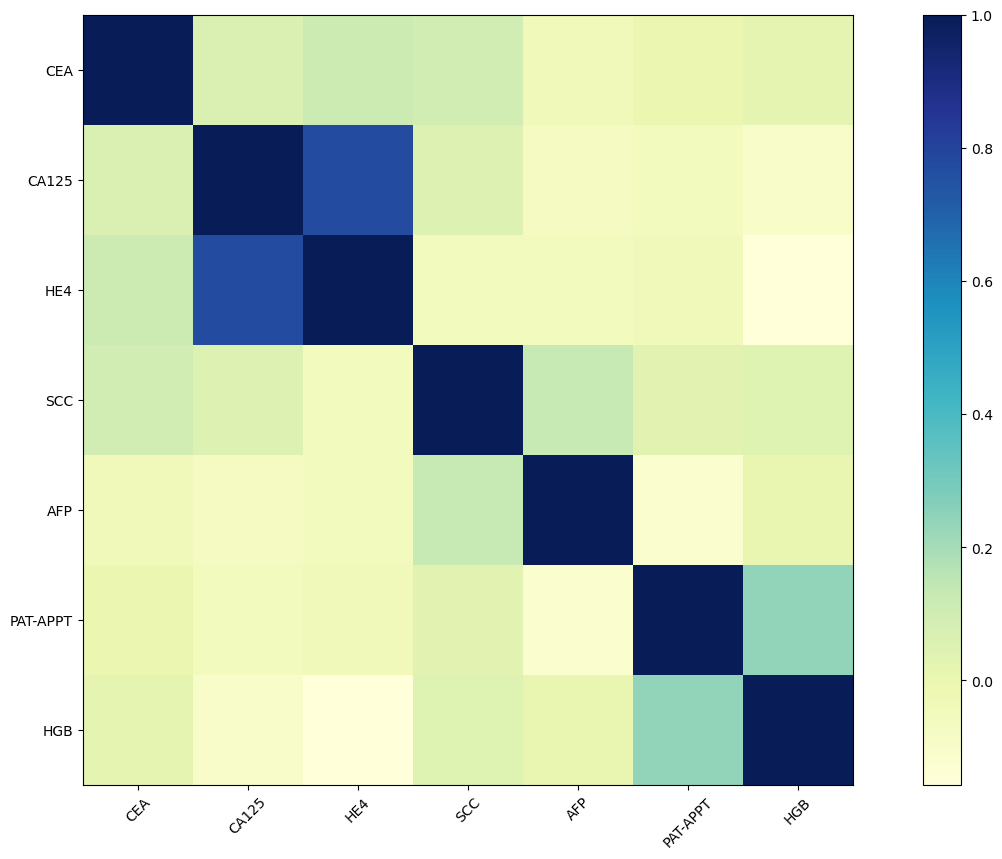

In [22]:
plt.figure(figsize=(18, 10))
plt.rcParams['font.sans-serif'] = ['/usr/share/fonts/truetype/kacst/KacstOffice.ttf']
plt.imshow(merged_df_1.iloc[:,2:-2].corr(), cmap='YlGnBu')
plt.colorbar()
plt.xticks(range(len(merged_df_1.iloc[:,2:-2].columns)), merged_df_1.iloc[:,2:-2].columns, rotation=45)
plt.yticks(range(len(merged_df_1.iloc[:,2:-2].columns)), merged_df_1.iloc[:,2:-2].columns)

In [23]:
# 导包
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler

In [24]:
# 分类
X=merged_df_1.iloc[:,2:
                    # 'PAT-APPT'
                    # 'AST'
                    # 'TT'
                    -2
  ]
print(X)
Y=merged_df_1.iloc[:,-2]

      CEA   CA125   HE4   SCC  AFP PAT-APPT  HGB
0     0.4    18.6   NaN  1.80  NaN      NaN  110
1     0.4    18.6   NaN  1.80  NaN      NaN  110
2     0.4    12.2   NaN  1.00  NaN      NaN  133
3     0.4    12.2   NaN  1.00  NaN      NaN  133
4     0.4    27.0  31.1  1.00  1.0      NaN  NaN
...   ...     ...   ...   ...  ...      ...  ...
1155  1.8  1180.7  38.0   NaN  2.4      NaN   94
1156  NaN    57.0  41.8   NaN  NaN     24.5  117
1157  1.5    13.7   NaN  0.70  1.0     27.3  140
1158  1.2    11.2  28.2   NaN  2.3      NaN  125
1159  1.6    32.8  45.1   NaN  3.4      NaN  141

[765 rows x 7 columns]


In [25]:
label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)
imputer=SimpleImputer(strategy='mean')
X=imputer.fit_transform(X)
# 标准化
scaler = StandardScaler()
X=scaler.fit_transform(X)
# 划分数据集
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=20)
smote = BorderlineSMOTE()
print(X)
# X_train.head(),X_train.shape,Y_test.shape,Y_test

[[-7.01301327e-01 -1.08069034e-01  0.00000000e+00 ...  0.00000000e+00
   2.06931839e-15 -7.29596603e-01]
 [-7.01301327e-01 -1.08069034e-01  0.00000000e+00 ...  0.00000000e+00
   2.06931839e-15 -7.29596603e-01]
 [-7.01301327e-01 -1.17488722e-01  0.00000000e+00 ...  0.00000000e+00
   2.06931839e-15  6.22030940e-01]
 ...
 [ 1.08576425e+00 -1.15280983e-01  0.00000000e+00 ... -1.08237514e+00
   8.74214405e-01  1.03339584e+00]
 [ 5.98382731e-01 -1.18960548e-01 -1.93226216e-01 ... -3.88609680e-01
   2.06931839e-15  1.51899621e-01]
 [ 1.24822476e+00 -8.71691017e-02 -1.76874257e-01 ...  1.98422631e-01
   2.06931839e-15  1.09216226e+00]]


# 结论
## 目前模型的准确率较低，只有65%左右。原因1：可能是原始数据中，肿瘤标志物数据较少，原因2：符合要求的数据太少
- 原始数据中缺少`CA153 CA199`，有`CA125，SCC，HE4`检测记录的患者分别约45%，10%，6%
- 最终筛选出的患者有765人，子宫肌瘤的诊断分为5类
## 并不是所有的特征都放入模型中，模型的分类能力最强
- `'CEA','CA125','HE4','SCC','AFP','PAT-APPT','HGB'`这7种组合是比较好的
- 对比了随机森林，决策树，支持向量机，人工神经网络四种分类模型，随机森林的效果最好